In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('insurance.xlsx')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Visualization

<Figure size 1200x1200 with 0 Axes>

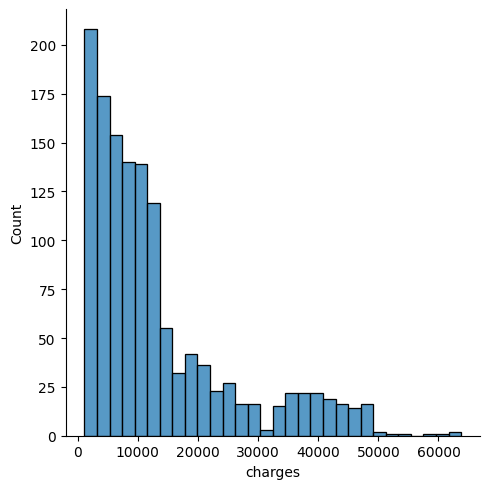

In [7]:
plt.figure(figsize=(12,12))
sb.displot(df['charges'])

# Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
from pandas.core.dtypes.common import is_numeric_dtype

In [17]:
for i in df.columns:
    if is_numeric_dtype(df[i]):
        continue
    else:
        df[i]=le.fit_transform(df[i])

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Split X,Y

In [21]:
from sklearn.model_selection import train_test_split as tts

In [22]:
x=df.drop('charges',axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [24]:
y=df[['charges']]
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [25]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=42)

In [26]:
xtrain.head()

,age,sex,bmi,children,smoker,region
332,61,0,31.160,0,0,1
355,46,1,27.600,0,0,3
138,54,0,31.900,3,0,2
381,55,1,30.685,0,1,0
292,25,1,45.540,2,1,2


In [27]:
xtest.head()

,age,sex,bmi,children,smoker,region
764,45,0,25.175,2,0,0
887,36,0,30.020,0,0,1
890,64,0,26.885,0,1,1
1293,46,1,25.745,3,0,1
259,19,1,31.920,0,1,1


# K-NN Regression

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
kn=KNeighborsRegressor()

In [48]:
kn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [49]:
pred_KN=kn.predict(xtest)

# Accuracy,MAE,MSE(Using K-NN)

In [50]:
accuracy_KN=r2_score(ytest,pred_KN)
print("Accuracy of K-NN:",accuracy_KN)

Accuracy of K-NN: 0.1267185153831346


In [51]:
mae_KN=mean_absolute_error(ytest,pred_KN)
print("MAE of K-NN:",mae_KN)

MAE of K-NN: 7888.692017271144


In [52]:
mse_KN=mean_squared_error(ytest,pred_KN)
print("MSE of K-NN:",mse_KN)

MSE of K-NN: 128044293.27870281


# Multivariable Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
reg=LinearRegression()

In [55]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [56]:
pred_Li=reg.predict(xtest)

# Accuracy,MAE,MSE(Using Multivariable Linear Regression)

In [58]:
accuracy_Li=r2_score(ytest,pred_Li)
print("Accuracy of Multivariable Linear Regression:",accuracy_Li)

Accuracy of Multivariable Linear Regression: 0.7694415927057693


In [59]:
mae_Li=mean_absolute_error(ytest,pred_Li)
print("MAE of Multivariable Linear Regression:",mae_Li)

MAE of Multivariable Linear Regression: 4155.239843059383


In [60]:
mse_Li=mean_squared_error(ytest,pred_Li)
print("MSE of Multivariable Linear Regression:",mse_Li)

MSE of Multivariable Linear Regression: 33805466.898688614


In [61]:
m=reg.coef_
m

array([[  261.62568984,   109.64719595,   344.54483066,   424.37016596,
        23620.80252148,  -326.46262527]])

# Data Frame

In [62]:
data={'Name':['K-NN Accuracy','K-NN MAE','K-NN MSE','Multivariable Linear Regression Accuracy'
             ,'Multivariable Linear Regression MAE','Multivariable Linear Regression MSE'],
     'Value':[accuracy_KN,mae_KN,mse_KN,accuracy_Li,mae_Li,mse_Li]}

In [63]:
df_after_predict=pd.DataFrame(data=data)

In [65]:
df_after_predict.head(6)

,Name,Value
0,K-NN Accuracy,1.267185e-01
1,K-NN MAE,7.888692e+03
2,K-NN MSE,1.280443e+08
3,Multivariable Linear Regression Accuracy,7.694416e-01
4,Multivariable Linear Regression MAE,4.155240e+03
5,Multivariable Linear Regression MSE,3.380547e+07


<Axes: xlabel='Value', ylabel='Name'>

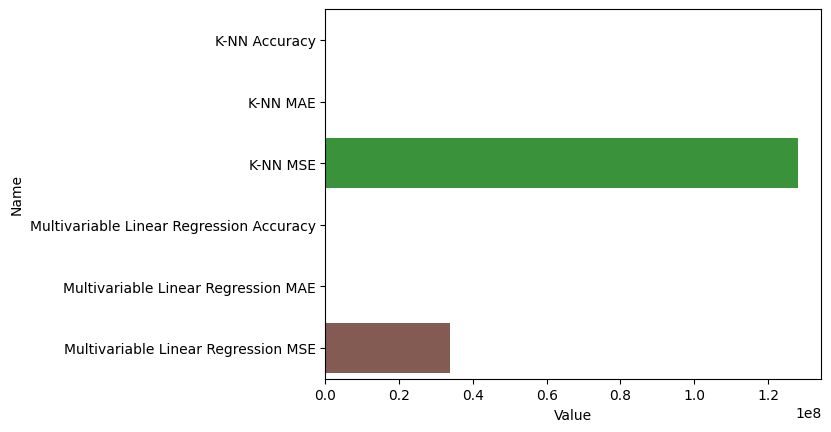

In [68]:
sb.barplot(x='Value',y='Name',data=df_after_predict)